In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "png"

In [2]:
df = pd.read_csv("./data/BigBasket Products.csv")
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [3]:
df.rename(columns={
    "sub_category": "subCategory", "sale_price": "salePrice", "market_price": "marketPrice"
}, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        27555 non-null  int64  
 1   product      27554 non-null  object 
 2   category     27555 non-null  object 
 3   subCategory  27555 non-null  object 
 4   brand        27554 non-null  object 
 5   salePrice    27555 non-null  float64
 6   marketPrice  27555 non-null  float64
 7   type         27555 non-null  object 
 8   rating       18929 non-null  float64
 9   description  27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [5]:
# Get table summary

Total_unique_products = len(df["product"].unique())
total_available_categories = len(df["category"].unique())
total_available_subcategories = len(df["subCategory"].unique())
top_brand = df["brand"].value_counts().keys()[0]
largest_product_qty = df["product"].value_counts().keys()[0]
total_nm_brands = len(df["brand"].unique())
product_type = len(df["type"].unique())

In [6]:
print(
    f" Total unique Products: {Total_unique_products} \n",
    f"Total Categories and Sub-Categories: {total_available_categories} and {total_available_subcategories} \n",
    f"Top Brand name: {top_brand} \n",
    f"Largest Product by Quantity: {largest_product_qty} \n",
    f"Total Brands in stock: {total_nm_brands}\n",
    f"Product Type Count: {product_type}"
)

 Total unique Products: 23541 
 Total Categories and Sub-Categories: 11 and 90 
 Top Brand name: Fresho 
 Largest Product by Quantity: Turmeric Powder/Arisina Pudi 
 Total Brands in stock: 2314
 Product Type Count: 426


In [7]:
qty_category = df["category"].value_counts().to_frame()
qty_category.reset_index(inplace=True)
qty_category.columns = ["category", "count"]

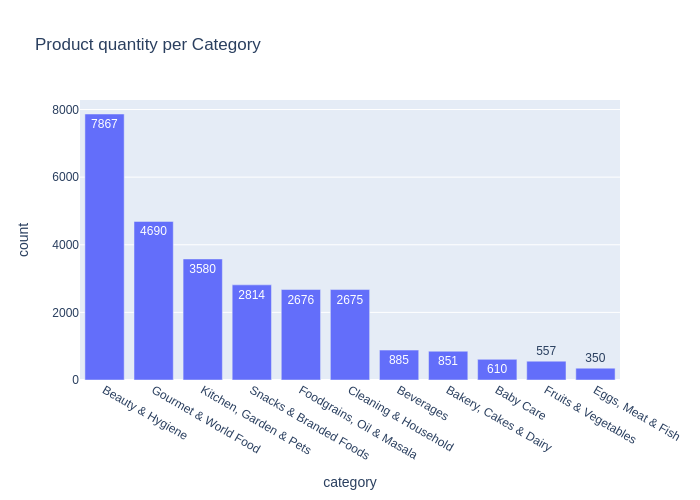

In [8]:
fig = px.bar(
    qty_category,
    x="category",
    y="count",
    text_auto=True,
    title="Product quantity per Category"
)
fig.show()

In [9]:
df_category_rating = df.groupby("category")["rating"].mean().to_frame()
df_category_rating.reset_index(inplace=True)

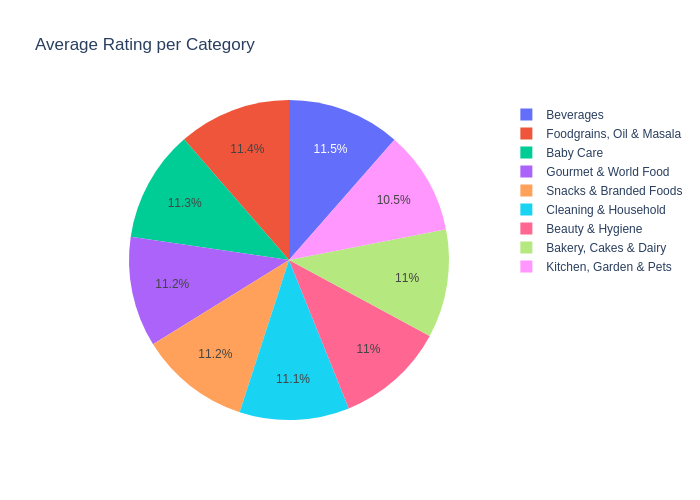

In [10]:
fig = px.pie(
    df_category_rating, values="rating", names="category",
    title="Average Rating per Category",
)
fig.show()

In [11]:
df_brand_rating = df.groupby("brand")["rating"].mean().to_frame()
df_brand_rating.reset_index(inplace=True)
df_brand_rating.sort_values(by="rating", ascending=False, inplace=True)

In [12]:
print('Top 5 Brands by Rating:')
print(f'{df_brand_rating[:10]} ')


Top 5 Brands by Rating:
              brand  rating
1699        RENUZIT     5.0
825       Goli Soda     5.0
2128       Trucrose     5.0
1979         Stute      5.0
350    Cambay Tiger     5.0
2224    Wedderspoon     5.0
394   Chef'S Basket     5.0
1541          Orino     5.0
528           Delfi     5.0
2116         Trents     5.0 


In [13]:
df["discount"] = ((df["marketPrice"] - df["salePrice"])/df["marketPrice"]) * 100
df["discount"] = df["discount"].round(1)

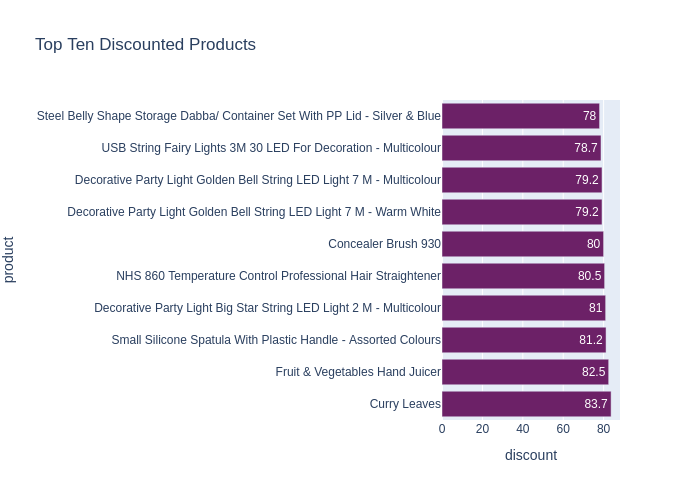

In [14]:
top_discount_product = df[["product", "category","discount"]].copy()
top_discount_product.sort_values(by="discount", ascending=False, inplace=True)

fig = px.bar(top_discount_product[:10], x="discount", y="product", text_auto=True,
            title="Top Ten Discounted Products", color_discrete_sequence=px.colors.carto.Magenta_r)
fig.show()

In [15]:
discounted_category = top_discount_product.groupby("category")["discount"].sum().to_frame()
discounted_category.reset_index(inplace=True)

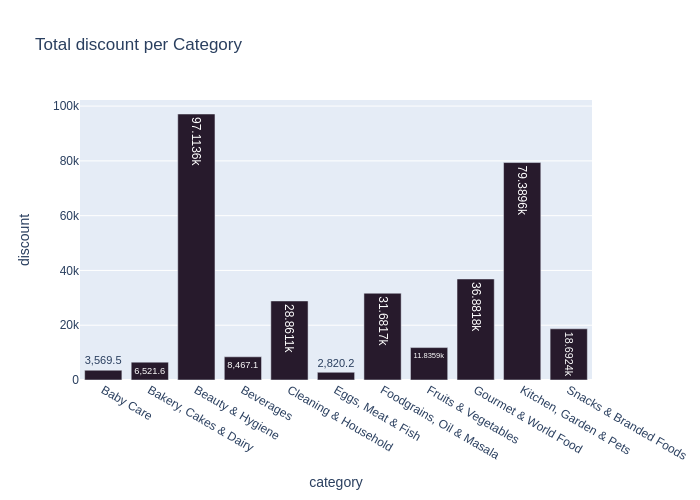

In [16]:
fig = px.bar(discounted_category, y="discount", x="category", text_auto=True,
            title="Total discount per Category", color_discrete_sequence=px.colors.cmocean.deep_r,)
fig.show()

In [17]:
product_type_sales = df.groupby("type")["salePrice"].mean().to_frame()
product_type_sales.reset_index(inplace=True)
product_type_sales.sort_values(by="salePrice", inplace=True, ascending=False)

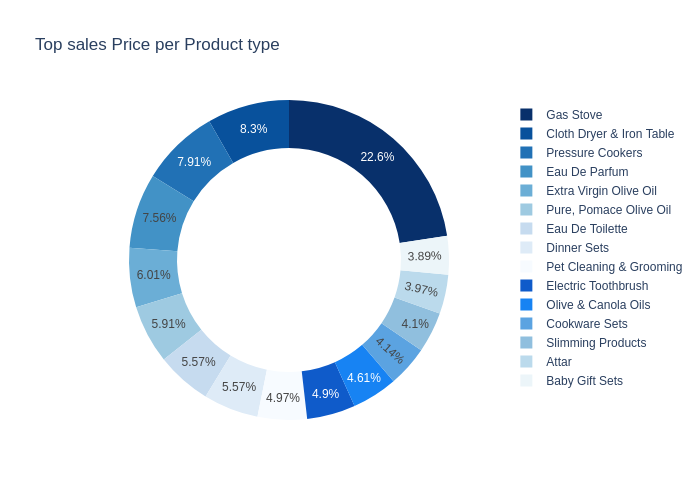

In [18]:
fig = px.pie(
    product_type_sales[:15], values="salePrice", names="type",
    title="Top sales Price per Product type",
    color_discrete_sequence=px.colors.sequential.Blues_r,
    hole=0.7
)
fig.show()

In [19]:
def find_price_range(df: pd.DataFrame, feature: str) -> dict:
    sales_range = dict()
    # df["salePrice"] = df["salePrice"].astype(int)
    for i in df["category"].unique():
        cat_frame = df[df["category"] == i]
        min_sales = cat_frame[feature].min()
        max_sales = cat_frame[feature].max()
        sales_range[i] = f"{min_sales} - {max_sales}"
    return sales_range


In [20]:
sales_range = find_price_range(df, feature="salePrice")

In [21]:
sales_range

{'Beauty & Hygiene': '3.0 - 8184.44',
 'Kitchen, Garden & Pets': '17.0 - 12500.0',
 'Cleaning & Household': '5.0 - 3600.0',
 'Gourmet & World Food': '5.0 - 7299.0',
 'Foodgrains, Oil & Masala': '9.5 - 4099.0',
 'Snacks & Branded Foods': '5.0 - 1950.0',
 'Beverages': '9.0 - 3480.0',
 'Bakery, Cakes & Dairy': '5.0 - 1108.0',
 'Baby Care': '15.0 - 3299.0',
 'Fruits & Vegetables': '2.45 - 527.0',
 'Eggs, Meat & Fish': '42.5 - 2249.1'}

In [22]:
discount_df = df[df["discount"] > 0.0].copy()

discount_range = find_price_range(discount_df, feature="discount")

In [23]:
discount_range

{'Cleaning & Household': '0.7 - 72.0',
 'Gourmet & World Food': '0.5 - 66.7',
 'Beauty & Hygiene': '1.0 - 80.5',
 'Kitchen, Garden & Pets': '1.0 - 82.5',
 'Snacks & Branded Foods': '1.0 - 60.2',
 'Foodgrains, Oil & Masala': '0.2 - 65.5',
 'Beverages': '0.3 - 62.2',
 'Bakery, Cakes & Dairy': '0.3 - 75.0',
 'Baby Care': '0.5 - 43.0',
 'Fruits & Vegetables': '20.0 - 83.7',
 'Eggs, Meat & Fish': '1.0 - 60.7'}

In [24]:
category_prod_sales = df.groupby(["category", "product"])["salePrice"].sum().to_frame()
category_prod_sales.reset_index(inplace=True)
category_prod_sales.sort_values(by="salePrice", ascending=False, inplace=True)

In [25]:
list_of_categories = category_prod_sales["category"].unique()[:4]

In [26]:
cat_prod_sale = {}
for cat in list_of_categories:
    cat_prod_sale[cat] = list()
    for i, r in category_prod_sales.iterrows():
        if r["category"] == cat:
            cat_prod_sale[cat].append([r["category"], r["product"], r["salePrice"]])
        if len(cat_prod_sale[cat]) == 3:
            break

In [27]:
cat_prod_sales = list(cat_prod_sale.values())

In [28]:
cat_prods = list()
for i in range(len(cat_prod_sales)):
    for n in range(len(cat_prod_sales[i])):
        cat_prods.append(cat_prod_sales[i][n])

In [29]:
cat_prod_sales = pd.DataFrame(cat_prods, columns=["category", "product", "salePrice"])
cat_prod_sales.head()

,category,product,salePrice
0,Gourmet & World Food,Extra Virgin Olive Oil,24216.53
1,Gourmet & World Food,Olive Oil - Extra Virgin,22369.22
2,Gourmet & World Food,Olive Pomace Oil,12137.00
3,Beauty & Hygiene,Eau De Toilette For Men,15525.00
4,Beauty & Hygiene,Deodorant Body Spray - Man Freedom EDT,11100.00


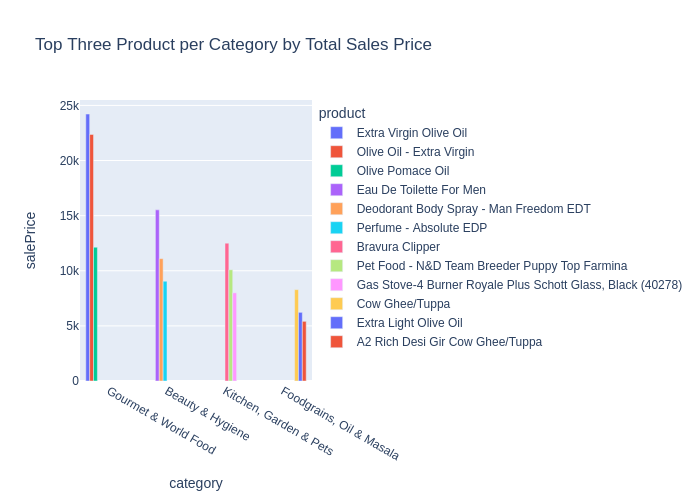

In [30]:
fig = px.bar(cat_prod_sales, x="category", y="salePrice", 
            color="product", barmode="group", title="Top Three Product per Category by Total Sales Price")
fig.show()